<a href="https://colab.research.google.com/github/saulostopa/data-science/blob/main/Identificando-imagem-via-template-matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definindo o caminho para a pasta onde estão as imagens no Google Drive
#IMPORTANTE! Todas as imagens usadas nos códigos estão na pasta indicada abaixo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH='/content/drive/MyDrive/PPGI/Disciplinas/VC_2021/imagens/'

#Declarando as bibliotecas que vamos usar no Pyhton

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib as mpl
from matplotlib import pyplot as plot
import math

#Template Matching
Métodos de similaridade: cv.TM_CCOEFF, cv.TM_CCOEFF_NORMED, cv2.TM_CCORR,
cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED


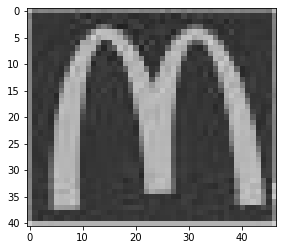

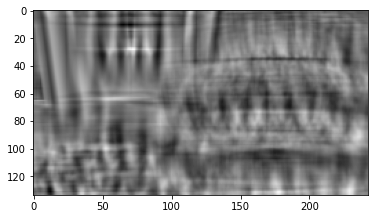

[[-0.02759375 -0.02652482 -0.03337857 ... -0.04393228 -0.04272963
  -0.03861975]
 [-0.02887449 -0.02759313 -0.0351136  ... -0.04422222 -0.04339698
  -0.03828898]
 [-0.02707205 -0.02699238 -0.03301641 ... -0.04572081 -0.04485141
  -0.03894535]
 ...
 [-0.05390498 -0.03550582 -0.02524974 ...  0.01367696  0.00869506
   0.00900551]
 [-0.03718109 -0.02016176 -0.0052785  ...  0.0438603   0.03843638
   0.03689074]
 [-0.0131831  -0.0035152   0.01119062 ...  0.04153502  0.03350246
   0.02902156]]


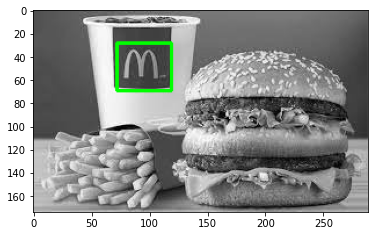

In [ ]:
#Le a imagem a ser analisada e o template
A = cv.imread(PATH+'A_mac_01.jpg')
T = cv.imread(PATH+'T_mac.jpg')
h = T.shape[0]
w = T.shape[1]
# Aplica template Matching
res = cv.matchTemplate(A,T,cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
# Se o método for TM_SQDIFF ou TM_SQDIFF_NORMED, top_left=min_loc
top_left = max_loc
#top_left=min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(A,top_left, bottom_right, (0,255,0), 2)
plot.imshow(T,cmap = 'gray')
plot.show()
plot.imshow(res,cmap = 'gray')
plot.show()
plot.imshow(A,cmap = 'gray')
#print(max_loc)
print(res)

#Atividade 1 - Teste Template Matching nas imagens dos brinquedos e apresente uma avaliação breve dos resultados.

In [ ]:
#testes da atividade 1 aqui

#Atividade 2 - Detectar todos os símbolos MC'Donalds ("T_mac2.jpg") na imagem "A_mac_11.jpg"

(array([31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34,
       34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36,
       37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39,
       39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41,
       41, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44,
       44, 44, 45, 45, 45, 45, 45, 46, 46, 46, 46, 47, 47]), array([136, 137, 138, 135, 136, 137, 138, 139, 135, 136, 137, 138, 139,
       140, 135, 136, 137, 138, 139, 140, 134, 135, 136, 137, 138, 139,
       140, 134, 135, 136, 137, 138, 139, 140, 134, 135, 136, 137, 138,
       139, 140, 134, 135, 136, 137, 138, 139, 140, 134, 135, 136, 137,
       138, 139, 140, 134, 135, 136, 137, 138, 139, 140, 134, 135, 136,
       137, 138, 139, 140, 135, 136, 137, 138, 139, 140, 135, 136, 137,
       138, 139, 140, 135, 136, 137, 138, 139, 440, 136, 137, 138, 139,
       440, 136, 137, 138, 440, 137, 138]))


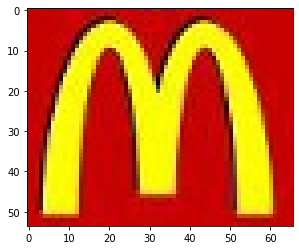

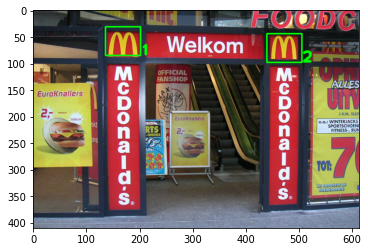

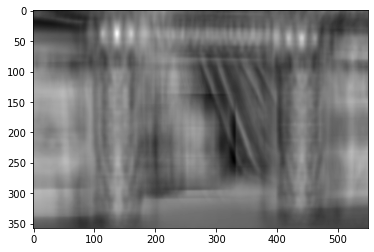

In [ ]:
#Le a imagem a ser analisada e o template
A = cv.imread(PATH+'A_mac_11.jpg')
A = cv.cvtColor(A,cv.COLOR_BGR2RGB)
T = cv.imread(PATH+'T_mac2.jpg')
T = cv.cvtColor(T,cv.COLOR_BGR2RGB)
#É preciso redimensionar (escalonar) o template
h = int(T.shape[0]/1.3)
w = int(T.shape[1]/1.3)
dim = (w,h)
T = cv.resize(T, dim, interpolation = cv.INTER_CUBIC)
# Aplica T Matching para detectar os símbolos
res = cv.matchTemplate(A,T,cv.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
#print(max_val)
# Assinala os símbolos na imagem
threshold = 0.83
loc = np.where(res >= threshold)
print(loc)
top_left_ant = (0, 0)
cont=1
for i in range (len(loc[0])):
  top_left = (loc[1][i], loc[0][i])
  bottom_right = (top_left[0] + w, top_left[1] + h)
  if top_left[0] > top_left_ant[0] + w or top_left[1] > top_left_ant[1] + h :
    cv.rectangle(A,top_left, bottom_right, (0,255,0), 2)
    cv.putText(A,str(cont), bottom_right,1,2,(0,255,0),3,1)
    #cv2.putText(A, 'OpenCV', org, font, fontScale, color, thickness, cv2.LINE_AA)
    top_left_ant = top_left
    cont = cont +1
  #print(loc[1][i], loc[0][i])
plot.imshow(T,cmap = 'gray')
plot.show()
plot.imshow(A,cmap = 'gray')
plot.show()
plot.imshow(res,cmap = 'gray')